# Report for 2D Project Physical World and Digital World

Cohort: F04

Team No.: 6

Members:
Ong Xiang Qian (1002646), Tan Wai Hong (1002894), Jack Ng Guang Jie (1002784), Monica Saravana (1002888), Ye Xinyi (1002868)


# Introduction

In this project, we are required to predict the steady state temperature of a solvent within 30s. We solve this problem by breaking it down into 2 smaller problem: How to get the actual temperature from the sensor, how to predict the steady state temperature using just time and instantaneous temperature. 

For the first problem, we calibrated the given temperature sensor by collecting datas on 7 known temperature using thermometer and the 7 output from the temperature sensor. 

Next, we plot a linear best fit line to get the conversion fomula. In our case the fomula is Y = 1.0191X -0.311, whereby Y is the calibrated temperature and X is the output from the temperature sensor.

For the second problem, we decided to find the co-relationship between (instantaneous time * instantaneous temperature) and the steady state temperature. To do this, for one steady state temperature, we took 11 readings of instantaneous time and the respective instantenous temperature. E.g.:

 [[0.1, 20.071], [0.88, 20.071], [2.72, 17.714], [4.48, 16.949], [6.42, 16.44], [8.00, 16.058], [9.76, 15.803] , [11.52, 15.548] , [13.28, 15.358], [15.04 , 15.166], [16.8, 15.039]]

The 0th index indicate the time in seconds and 1st index in indicate the temperature in celcius
The preprocessing part multiplies the time and the temperature together and give back a list. E.g. :

[2.01, 17.66, 48.18, 75.93, 105.54, 128.46, 154.24, 179.11, 203.95, 228.1, 252.66]

After collecting several data of different steady state temperature, we use scikit-learn linear regression to find the coefficients for the 11 inputs.

To predict the temperature: First we get 11 readings of instantaneous time and the respective instantenous temperature. Next, we multiply the coefficients together with the product of the time and respective temperature.

Result: We are able to predict the temperature at < 18s consistently and get the temperature of +- 1.5 degree celcius

# Description of Data from Experiment

## Data Collection

Our aim during the collection of data is to have a equally distributed temperature between 10 degree celcius and 60 degree celcius. In this case, we use a thermoflask and vary the temperature of the water in it to get data.

For Calibration, we took the given thermometer to measure the actual temperature of the water.Next, we use the temperature sensor to get the output. This method was to ensure we get as close to the accurate tempereature reading from the temperature sensor.

To build the model, we took the given thermometer to measure the actual temperature of the water as well.After which, we use the temperature sensor with calibrated values to get 11 readings of [time , output of temperature sensor]. This method is to ensure that we have enough data to make accurate model for the prediction of temperature. The actual temperature of the water (also known as label), is stored in this format :[30 , label]. It is then appended to the front of the 11 readings

The underlying hypothesis is that every steady state temperature have their unique graphs. As such, they have their own unique area (instantaneous time * instantaneous temperature) along the graph.

The recording only starts when the temperature sensor sense a sudden change in temperature (0.4 seconds in our case) so as to prevent negative readings.


## Data Preparation

For Calibration, there was no preprocessing to data needed as it is a simple best fit linear graph.

For the model: For each steady state temperature, we multiply each instantanous time with the corresponding tempereature.

[[0.1, 20.071], [0.88, 20.071], [2.72, 17.714], [4.48, 16.949], [6.42, 16.44], [8.00, 16.058], [9.76, 15.803] , [11.52, 15.548] , [13.28, 15.358], [15.04 , 15.166], [16.8, 15.039]]
 
 to
 
 [2.01, 17.66, 48.18, 75.93, 105.54, 128.46, 154.24, 179.11, 203.95, 228.1, 252.66]
 

In [13]:
ls = [[[30,53.9], [0.1, 28.509], [0.981, 38.572], [2.841, 42.33], [4.701, 44.432], [6.503, 45.897], [8.363, 47.171], [10.224, 48.127], [12.021, 48.954], [13.88, 49.655], [15.744, 50.228], [17.544, 50.737]]
,[[30,36.8], [0.1, 28.254], [0.962, 32.203], [2.825, 33.158], [4.69, 33.795], [6.483, 34.177], [8.358, 34.559], [10.165, 34.814], [12.086, 35.069], [13.955, 35.133], [15.765, 35.388], [17.638, 35.515]]
,[[30,59.2], [0.1, 27.999], [0.982, 42.967], [2.846, 47.362], [4.664, 49.718], [6.531, 51.502], [8.342, 52.712], [10.21, 53.732], [12.028, 54.559], [13.895, 55.323], [15.703, 55.897], [17.568, 56.407]]
,[[30,41.8], [0.1, 28.509], [0.982, 33.922], [2.843, 35.833], [4.706, 36.916], [6.503, 37.617], [8.371, 38.19], [10.182, 38.572], [12.046, 38.955], [13.863, 39.273], [15.727, 39.527], [17.592, 39.719]]
,[[30,26.7], [0.1, 28.317], [0.957, 27.362], [2.821, 27.108], [4.687, 26.98], [6.478, 26.853], [8.341, 26.789], [10.207, 26.725], [12.0, 26.661], [13.87, 26.598], [15.682, 26.534], [17.551, 26.534]]
,[[30,15.6], [0.1, 28.572], [0.978, 22.904], [2.841, 20.866], [4.707, 19.719], [6.498, 18.955], [8.36, 18.381], [10.224, 17.936], [12.022, 17.617], [13.886, 17.299], [15.699, 17.107], [17.568, 16.917]]
,[[30,21.9], [0.1, 28.19], [0.961, 25.324], [2.832, 24.368], [4.644, 23.795], [6.512, 23.413], [8.323, 23.159], [10.193, 22.967], [12.001, 22.84], [13.864, 22.712], [15.685, 22.585], [17.551, 22.522]]
,[[30,16.4], [0.1, 28.19], [0.966, 22.84], [2.833, 21.184], [4.647, 20.164], [6.512, 19.4], [8.326, 18.955], [10.189, 18.573], [12.054, 18.254], [13.846, 17.999], [15.713, 17.808], [17.53, 17.617]]
,[[30,21.5], [0.1, 27.808], [0.98, 25.324], [2.843, 23.986], [4.708, 23.286], [6.5, 22.84], [8.365, 22.522], [10.182, 22.267], [12.051, 22.075], [13.858, 21.948], [15.723, 21.82], [17.587, 21.757]]
,[[30,45.5], [0.1, 27.426], [0.978, 35.833], [2.848, 38.445], [4.66, 39.719], [6.525, 40.611], [8.338, 41.248], [10.206, 41.757], [12.017, 42.202], [13.884, 42.585], [15.746, 42.904], [17.536, 43.158]]
,[[30,32.1], [0.1, 28.127], [0.985, 30.101], [2.847, 30.483], [4.711, 30.738], [6.58, 30.865], [8.451, 30.992], [10.262, 31.12], [12.127, 31.184], [13.991, 31.247], [15.789, 31.247], [17.651, 31.311]]
,[[30,39.9], [0.1, 28.827], [0.976, 34.369], [2.944, 35.388], [4.736, 36.088], [6.598, 36.534], [8.463, 36.98], [10.254, 37.299], [12.118, 37.617], [13.937, 37.871], [15.806, 38.126], [17.623, 38.318]]
,[[30,32.4], [0.1, 28.381], [0.956, 30.42], [2.827, 30.865], [4.63, 31.12], [6.502, 31.247], [8.311, 31.375], [10.193, 31.502], [11.997, 31.566], [13.859, 31.629], [15.671, 31.694], [17.542, 31.694]]
,[[30,12.6], [0.1, 18.415], [0.88, 17.459], [2.64, 16.249], [4.4, 15.548], [6.24, 15.039], [8.0, 14.721] , [9.76, 14.466], [11.52, 14.274], [13.28, 14.084] , [15.04, 13.956], [16.88 , 13.829]]
,[[30,54.8], [0.1, 25.324], [0.955, 40.101], [2.820, 43.604], [4.63, 45.834], [6.500, 47.425], [8.315, 48.827], [10.193, 49.91], [12.000, 50.737], [13.900, 51.12], [15.70, 51.948], [17.50, 52.33]]
,[[30,14.5], [0.1, 25.069], [0.955, 20.866], [2.820, 18.955], [4.63, 17.808], [6.525, 17.426], [8.300, 16.534], [10.200, 16.152], [12.024, 15.897], [13.915, 15.643], [15.7, 15.515], [17.550, 15.388]]
,[[30,13.8], [0.1, 20.071], [0.88, 20.071], [2.72, 17.714], [4.48, 16.949], [6.42, 16.44], [8.00, 16.058], [9.76, 15.803] , [11.52, 15.548] , [13.28, 15.358], [15.04 , 15.166], [16.8, 15.039]]]

label = []
data_set = []
for data in ls:
    new = []
    for i in range(len(data)):
        if i == 0:
            label.append(data[i][1])
        else:
            new.append(round(data[i][0] * data[i][1],2))
    data_set.append(new)
#print("Data sets: {}".format(data_set))
#print("labels : {}".format(label))

## Data Format

The data collected will be be points found on the steady state temperature (label). As shown below, the green line shall represent temperature X and blue line shall represent temperature Y. X has unique time * temperature points as the time increases and so does Y. Using this uniqueness for each steady state temperature, we are going find the correlation for the first 11 (time x temperature) of each temperature using linear regression. The code below is used to show an example of the graph.


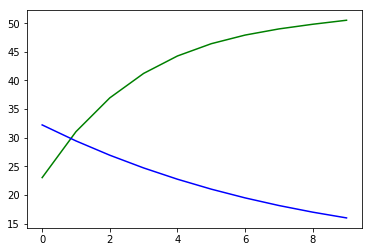

In [7]:
import matplotlib.pyplot as plt
def temp1(x): 
    y = 23.04 +(9.28)*x + (-1.36)*(x**2) + (0.11)*(x**3) + (-0.0050)*(x**4) + (0.000114)*(x**5) 
    return y

def temp2(x): 
    z = 32.24 + (-2.95)*x + (0.16)*(x**2) + (-0.0038)*(x**3) + (1.12E-05)*(x**4) + (8.40E-07)*(x**5) 
    return z

x = [i for i in range(10)]
y1 = [temp1(i) for i in x]
y2 = [temp2(i) for i in x]

plt.plot(x,y1, color = 'green')
plt.plot(x,y2, color = 'blue')
plt.show()

# Training Model

The model is trained by using scikit-learn Linear Regression model. This is done using 17 data points collected. The function will return the coefficients and intercept which can be used to predict temperature.

In [6]:
from sklearn import linear_model 
import numpy as np

def regression():
    X = np.array(data_set)
    Y = np.array(label)
    
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    return regr.coef_,regr.intercept_

print(regression())

(array([ 0.4115733 , -0.42685329, -0.29143602,  0.19531992,  0.18780706,
        0.20453365, -0.13463903, -0.21820958, -0.08252079,  0.24181546,
       -0.01333128]), -1.470558769632504)


# Verification and Accuracy

The model was then tested against 3 known water bath of different temperature that was not feed into the training. The result was appreciable predicted temperature of < 1.5 degree celcius difference.

Analysis: Initially, the model was modelled after just the temperature, not (time x temperature). However, the prediction was not very accurate.The hypothesis was that the temperature taken was at different time interval for all the data and severely damange the accuracy of the model. As such, we have remodelled the model to the current one, which is regression for (time x temperature). This proves to be more accurate than the previous model. 

Steps to improve accuracy: Take more sample data over 10 degree celcius to 60 degree celcius to ensure that the training data covers most grounds for the model to correctly predict any given water bath temperature within the range. 
To improve the accuracy, we decided to add in more data sets to the training but found that the accuracy dropped as well. One such reason was that the model might be over-fitted and thus reduce the overall accuracy.

In [30]:
test = [[[30, 42.045], [0.1, 36.058], [0.88,36.759],[2.64, 37.778],[4.4, 38.415], [6.16, 38.988], [7.92, 39.37], [9.68, 39.752], [11.44, 40.007], [13.2, 40.261], [14.96, 40.516], [16.72, 40.644]]
,[[30,49.625], [0.1, 37.077],[0.881, 38.988],[2.64, 41.535], [4.4, 43.064], [6.16, 44.147], [7.922, 45.039], [9.68, 45.739], [11.44, 46.313], [13.2, 46.758], [14.96, 47.14], [16.72, 47.459]]
,[[30,56.631], [0.1, 25.294], [0.88, 36.122], [2.72,42.746], [4.48, 46.376], [6.24, 48.606], [8.0, 50.134], [9.76, 51.408], [11.52, 52.363], [13.28, 53.192], [15.04, 53.764], [16.8, 54.274]]]

t_label = []
t_data_set = []
for data in test:
    new = []
    for i in range(len(data)):
        if i == 0:
            t_label.append(data[i][1])
        else:
            new.append(round(data[i][0] * data[i][1],2))
    t_data_set.append(new)
print("Actual: {}".format(t_label))
#print(t_data_set)

from sklearn import linear_model 
import numpy as np
from sklearn.metrics import accuracy_score

def regression():
    X = np.array(data_set)
    Y = np.array(label)
    
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    output = regr.predict(t_data_set)
    #print(accuracy_score(output,t_label))
    return output

pred = regression()
print("prediction: {}".format(pred))
print("Difference: {}".format(np.subtract(t_label, pred)))

Actual: [42.045, 49.625, 56.631]
prediction: [41.01250286 48.29525195 57.59455541]
Difference: [ 1.03249714  1.32974805 -0.96355541]


# Testing Using Instructor's Data

Instruction:

* Store your trained model into a pickle object which can be loaded. 
* Read an excel file with the following format:
```
time (s)	reading
0.00	    25.812
0.90	    28.562
1.79	    31.875
2.68	    35.062
3.55	    37.937
4.43	    40.687
5.30	    43.25
```
where the first column indicates the time in seconds and the second column indicates the sensor reading in Celsius. 
* The number of rows in the instructors' data can be of any number. If your code has a minimum number of rows, your code must be able to handle and exit safely when the data provided is less than the required minimum.
* Write a code to prepare the data for prediction.
* Write a code to predict the final temperature.



In [4]:
# write a code to load your trained model from a pickle object
# no model saved in pickle , only saved as coefficients and intercept

In [ ]:
#Collect the first 11 data sets. To get ideal sets, choose the data that are closest to: 0s , 1s ,
2.8s , 4.8s , 6.4s, 8.4s, 10.2s, 12s, 14s, 15.6s , 17.6s

temp = [] # the 11 temperatures
e_time = [] # the 11 timings
with open("excelfile",'r') as f:
    for i in range(11):   
        r = f.readline()
        e_time.append(r[0])   # store the timing
        temp.append(r[1])    # store the temperature



# write a code to read an excel file
import pandas as pd
num_test = 9
filename = 'temp_' 
filekey = [] # instructors will key in this
dataframe = {} # this is to store the data for different temperature, the keys are in filekey
for idx in range(num_test):
    dataframe[filekey[idx]] = pd.read_excel(filename+filekey[idx]+'.xlsx')


In [1]:
# write a code to prepare the data for training
coeff = [ 0.4115733,-0.42685329,-0.29143602,0.19531992,0.18780706,0.20453365,
          -0.13463903,-0.21820958,-0.08252079,0.24181546,-0.01333128]   # the coefficient
total = -1.47055877  #the intercept

In [2]:
# write a code to predict the final temperature
# store the predicted temperature in a variable called "predicted"
# predicted is a dictionary where the keys are listed in filekey
predicted = {}


for i in range(11):
    y = temp_[i] * coeff[i] * e_time[i]
    self.total += round(y,1)
    
predicted.update({'key': total})


IndexError: list index out of range

In [ ]:
# checking accuracy

# first instructor will load the actual temp from a pickle object
import pickle
error_d = {}
accuracy_percent_d = {}

for test in range(num_test):
    filename = 'data_'+filekey[test]+'.pickle'
    with open(filename,'rb') as f:
        final_temp, worst_temp = pickle.load(f)

    # then calculate the error
    error_final = abs(final_temp-predicted[filekey[test]])
    accuracy_final_percent = 100-error_final/final_temp*100
    error_worst = abs(worst_temp-predicted[filekey[test]])
    accuracy_worst_percent = 100-error_worst/worst_temp*100
    
    error_d[filekey[test]] = (error_final, error_worst)
    accuracy_percent_d[filekey[test]] = (accuracy_final_percent, accuracy_worst_percent)

    # displaying the error
    print('===================================')
    print('Testing: {}'.format(filekey[test]))
    print('Predicted Temp: {:.2f}'.format(predicted[filekey[test]]))
    print('Final Sensor Temp: {:.2f}, Alcohol Temp:{:.2f}'.format(final_temp, worst_temp))
    print('Error w.r.t Final Sensor Temp: {:.2f} deg, {:.2f}% accuracy'.format(error_final, accuracy_final_percent))
    print('Error w.r.t Alcohol Temp: {:.2f} deg, {:.2f}% accuracy'.format(error_worst, accuracy_worst_percent))
    
avg_final = sum([ final for final, worst in accuracy_percent_d.values()])/len(error_d.values())
avg_worst = sum([ worst for final, worst in accuracy_percent_d.values()])/len(error_d.values())
print('==============================')
print('Average accuracy for final sensor temp: {:.2f}'.format(avg_final))
print('AVerage accuracy for alcohol temp: {:.2f}'.format(avg_worst))
